In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


In [2]:
df = pd.read_csv("/content/Building Energy Efficiency.csv")
df.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.763885,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105490,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.820000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
df["Total_Energy"] = df["Heating Load"] + df["Cooling Load"]
df["Green_Score"] = 100 - df["Total_Energy"]


In [8]:
scaler = MinMaxScaler(feature_range=(0,100))
df["Green_Score"] = scaler.fit_transform(df[["Green_Score"]])


In [9]:
def green_rating(score):
    if score >= 80:
        return "Platinum"
    elif score >= 60:
        return "Gold"
    elif score >= 40:
        return "Silver"
    else:
        return "Non-Green"

df["Green_Rating"] = df["Green_Score"].apply(green_rating)
df.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Total_Energy,Green_Score,Green_Rating
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,72.698630,Gold
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,72.698630,Gold
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,72.698630,Gold
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,72.698630,Gold
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,55.931507,Silver


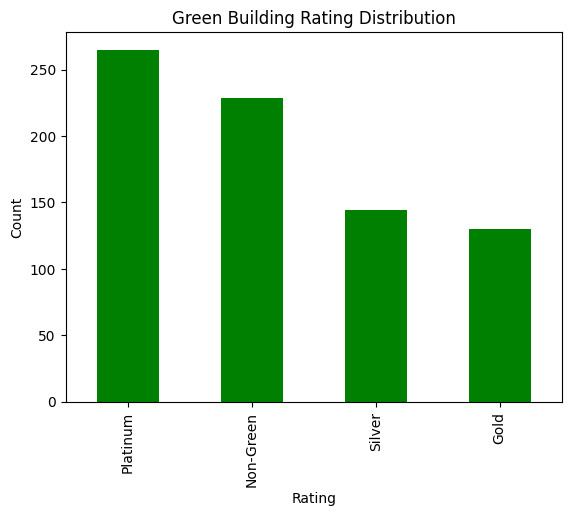

In [10]:
df["Green_Rating"].value_counts().plot(kind="bar", color="green")
plt.title("Green Building Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


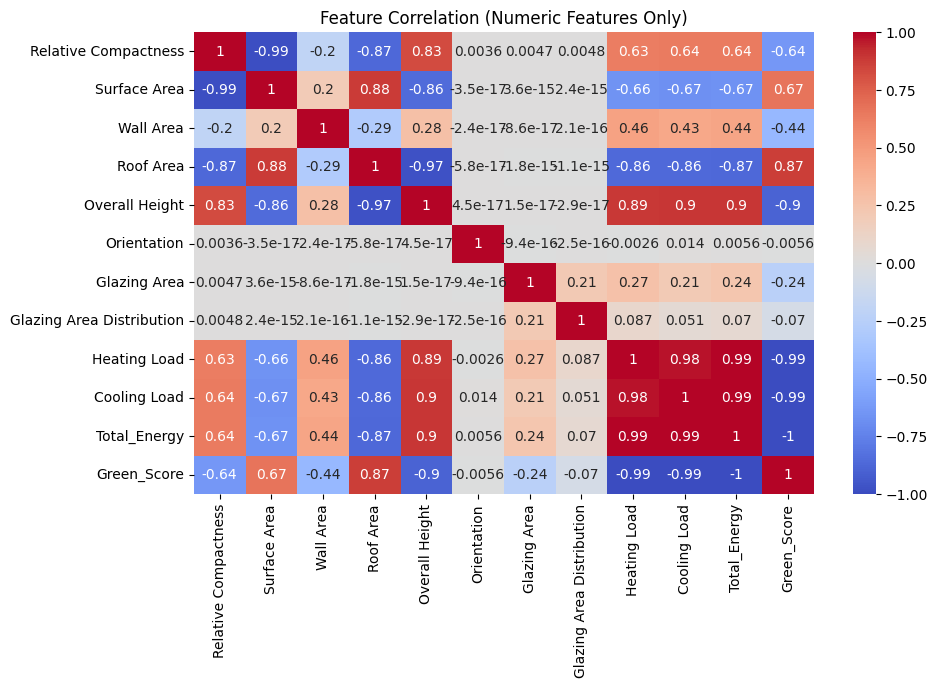

In [12]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Feature Correlation (Numeric Features Only)")
plt.show()


In [13]:
X = df.drop(["Green_Score", "Green_Rating", "Total_Energy"], axis=1)

y_reg = df["Green_Score"]
y_clf = df["Green_Rating"]


In [14]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)


In [15]:
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train_reg)

y_pred_reg = reg_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print("RMSE:", rmse)


RMSE: 0.5549533902700928


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

        Gold       1.00      1.00      1.00        22
   Non-Green       1.00      1.00      1.00        51
    Platinum       1.00      1.00      1.00        52
      Silver       1.00      1.00      1.00        29

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



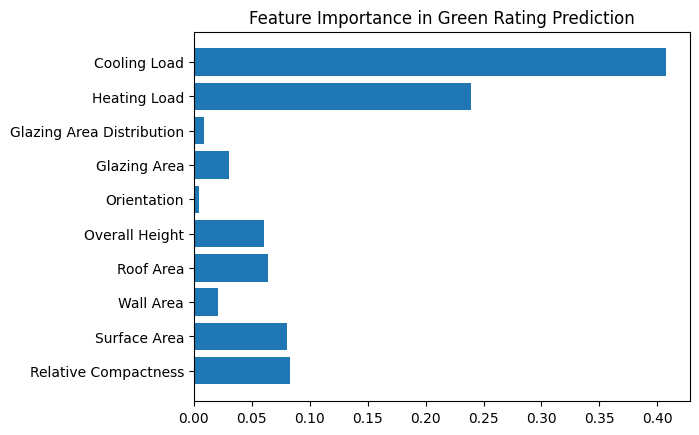

In [17]:
importances = clf_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title("Feature Importance in Green Rating Prediction")
plt.show()


In [18]:
sample = X.iloc[[0]]

pred_score = reg_model.predict(sample)
pred_rating = clf_model.predict(sample)

print("Predicted Green Score:", pred_score[0])
print("Predicted Green Rating:", pred_rating[0])


Predicted Green Score: 72.64369863013688
Predicted Green Rating: Gold
